In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

data = pd.read_csv("/kaggle/input/letterrecognition-using-svm/letter-recognition.csv")
all_data = data
data = data[["width ", "height"]].to_numpy()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
min_clusters = 1
max_clusters = 10
interval = 1

models = {}
inertia_values = []

for i in range(min_clusters, max_clusters, interval):
    model = KMeans(i)
    model.fit(np.reshape(data, (data.shape[0], -1)))
    models[i] = model
    inertia_values.append(model.inertia_)

<AxesSubplot:>

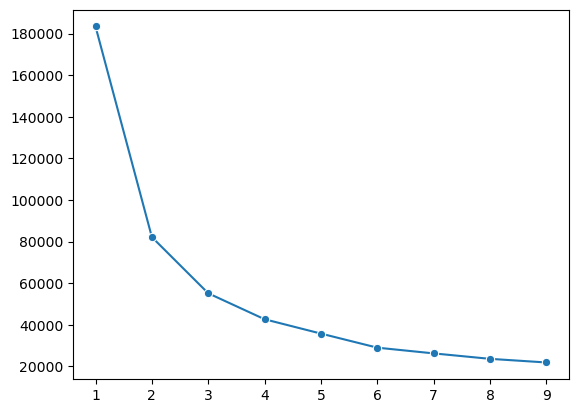

In [3]:
sns.lineplot(x=[i for i in range(min_clusters, max_clusters, interval)],
             y=inertia_values, marker="o", markers=True)

In [4]:
cluster_count = 3
model = models[cluster_count]
centroids = model.cluster_centers_

for centroid in centroids:
    print(centroid)

[7.13553618 7.60501759]
[4.81358885 5.2652439 ]
[2.70717457 2.19186726]


In [5]:
predictions = model.predict(data)
values, counts = np.unique(predictions, return_counts=True)

def number_postfix(number):
    if number == 1:
        return "st"
    
    elif number == 2:
        return "nd"
    
    elif number == 3:
        return "rd"
    
    return "th"

for index, i in enumerate(counts):
    print(f"{index + 1}-{number_postfix(index + 1)} cluster has {i} members")

1-st cluster has 6537 members
2-nd cluster has 9184 members
3-rd cluster has 4279 members


In [6]:
from pprint import pprint
for i in range(cluster_count):
    letters, counts = np.unique(all_data["letter"][predictions == i], return_counts=True)
    pprint(list(zip(letters, counts)))

[('A', 230),
 ('B', 236),
 ('C', 201),
 ('D', 247),
 ('E', 190),
 ('F', 220),
 ('G', 238),
 ('H', 263),
 ('I', 107),
 ('J', 178),
 ('K', 312),
 ('L', 182),
 ('M', 372),
 ('N', 315),
 ('O', 239),
 ('P', 298),
 ('Q', 344),
 ('R', 236),
 ('S', 229),
 ('T', 219),
 ('U', 260),
 ('V', 258),
 ('W', 348),
 ('X', 287),
 ('Y', 292),
 ('Z', 236)]
[('A', 400),
 ('B', 355),
 ('C', 358),
 ('D', 388),
 ('E', 395),
 ('F', 374),
 ('G', 364),
 ('H', 331),
 ('I', 329),
 ('J', 368),
 ('K', 306),
 ('L', 383),
 ('M', 294),
 ('N', 325),
 ('O', 338),
 ('P', 327),
 ('Q', 299),
 ('R', 363),
 ('S', 375),
 ('T', 386),
 ('U', 396),
 ('V', 382),
 ('W', 296),
 ('X', 360),
 ('Y', 357),
 ('Z', 335)]
[('A', 159),
 ('B', 175),
 ('C', 177),
 ('D', 170),
 ('E', 183),
 ('F', 181),
 ('G', 171),
 ('H', 140),
 ('I', 319),
 ('J', 201),
 ('K', 121),
 ('L', 196),
 ('M', 126),
 ('N', 143),
 ('O', 176),
 ('P', 178),
 ('Q', 140),
 ('R', 159),
 ('S', 144),
 ('T', 191),
 ('U', 157),
 ('V', 124),
 ('W', 108),
 ('X', 140),
 ('Y', 137),